 **Manuela Góez Estepa**



# Proyecto Computacional 1

In [ ]:
#@markdown Librerías

import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import pandas as pd
from IPython.core.display import HTML

1. Haga una gráfica RA/DEC que muestre el efecto de colimación relativístico visto desde la nave para cada estrella en la constelación. En la gráfica se deben ver las posiciones originales de las estrellas vs. las observadas desde la nave.

La intención de este reto es explorar y evidenciar computacionalmente el comportamiento delos rayos de luz observados por un cuerpo que se mueve a velocidades relativistas hacia el centro de la constelación del Can Mayor.

In [ ]:
#@markdown En primer lugar se extraen los valores de posiciones y longitud de onda para las estrellas del Can Mayor, a su vez, se convierten los valores de RA y Dec a radianes.


rad=np.pi/180

datos=pd.read_csv("cma_data.csv")

datos["ra [rad]"]=datos["ra"]*rad
datos["dec [rad]"]=datos["dec"]*rad

datos.head()

,index,ra,dec,lam,ra [rad],dec [rad]
0,1,101.288541,-16.713143,601,1.767819,-0.291699
1,2,104.656445,-28.972089,601,1.826600,-0.505658
2,3,107.097859,-26.393208,701,1.869210,-0.460648
3,4,95.674948,-17.955917,601,1.669843,-0.313390
4,5,111.023771,-29.303120,601,1.937730,-0.511436


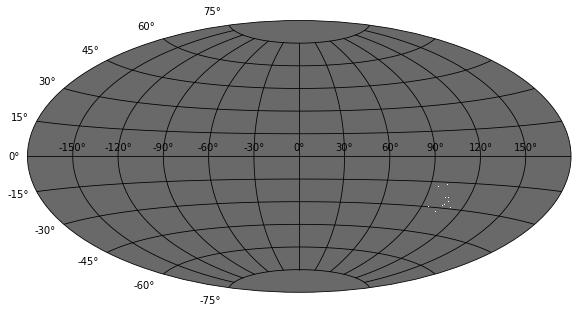

In [ ]:
#@markdown La proyección Aitoff es útil para representar coordenadas ecuatoriales absolutas, en este caso podemos observar claramente la ubicación de la constelación a estudiar.

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection="aitoff", facecolor ='dimgray')
ax.plot(datos["ra [rad]"],datos["dec [rad]"],",",color="white")
ax.grid(True,color="k")


Text(0, 0.5, 'DEC (rad)')

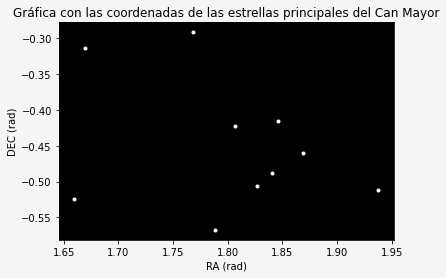

In [ ]:
#@markdown Constelación Can Mayor

plt.figure(facecolor="whitesmoke")
plt.axes().set_facecolor("k")
plt.title("Gráfica con las coordenadas de las estrellas principales del Can Mayor")
plt.plot(datos["ra [rad]"],datos["dec [rad]"],".",color="white")
plt.xlabel('RA (rad)')
plt.ylabel('DEC (rad)')


Text(0, 0.5, 'DEC (rad)')

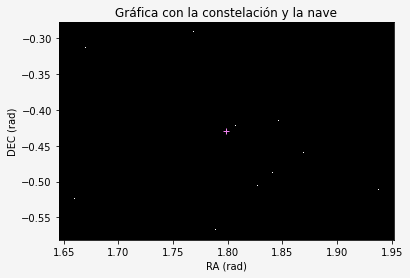

In [ ]:
#@markdown Consideremos la dirección de la nave (centro de la constelación) como el punto medio entre mayor y menor en cada coordenada
nave_ra=(max(datos["ra [rad]"])+min(datos["ra [rad]"]))/2      #ascensión recta en radianes
nave_dec=(max(datos["dec [rad]"])+min(datos["dec [rad]"]))/2   #declinación en radianes


#gráfica
plt.figure(facecolor="whitesmoke")
plt.axes().set_facecolor("k")
plt.title("Gráfica con la constelación y la nave")
plt.plot(datos["ra [rad]"],datos["dec [rad]"],",",color="white")
plt.plot(nave_ra,nave_dec,"+",color="violet")
plt.xlabel('RA (rad)')
plt.ylabel('DEC (rad)')

In [ ]:
#@markdown Definición de los parámetros de velocidad en términos de c

#velocidad de la nave v/c

v_c=0.4 #@param {type:"number"}

#factor gamma
γ=1/(1-v_c)**0.5

print(f"Para una velocidad de v={v_c}c el factor de Lorentz es γ={γ:.2f}")

Para una velocidad de v=0.4c el factor de Lorentz es γ=1.29


**Colimasión**


Para hallar la distancia angular entre cada estrella $A$ a el punto donde se dirige la nave, es necesario usar trigonometría esférica. Para esto debemos considerar que todos los astros están sobre la bóveda celeste, una esfera imaginaria de radio escogido arbitrariamente como 1.

Notemos que el punto hacia donde se dirige la nave, llamémoslo $O$, tiene una distancia esférica con respecto a cada estrella. Para hallar éste valor $AO$ consideramos el triángulo formado por $PAO$, donde $P$ es el punto ubicado a declinación =-90° (pues todas las estrellas tienen declinación negativa en este caso y es más conveniente usar el punto "extremo" al sur). Así notemos que del triángulo esférico $PAO$ conocemos $PA=|-90°-δ_A|$ y $PO=|-90°-δ_O|$ (el valor absoluto es porque las distancias (longitud del triánguo) deben ser positivas) y el ángulo entre $PA$ y $PO$ está dado por $\alpha=|RA_A-RA_O|$.Para ilustrar ésta situación observar la Figura 1.

Luego, por regla del coseno en trigonometría esférica:

\begin{equation}
cos(AO)=cos(PO)cos(PA)+sen(PA)sen(PO)cos(\alpha)\\
AO=arccos(cos(PO)cos(PA)+sen(PA)sen(PO)cos(\alpha))
\end{equation}



Figura 1. Ilustración del triángulo esférico formado por $O$ y $A$.

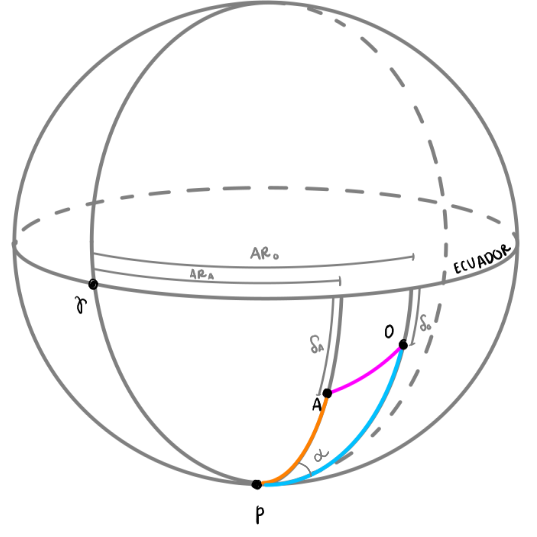

In [ ]:
#@markdown Cuando la nave está en reposo, las estrellas tienen la ubicación proporcionada en la tabla. Ahora hallamos la distancia angular entre el punto $P$, la nave y la estrella.

PA=np.abs(-np.pi/2-datos["dec [rad]"]).to_numpy()   #Los convierto a arreglo de numpy
PO=np.abs(-np.pi/2-nave_dec)

α=np.abs(datos["ra [rad]"]-nave_ra).to_numpy()

cosAO=np.cos(PO)*np.cos(PA)+np.sin(PA)*np.sin(PO)*np.cos(α)
AO=np.arccos(cosAO)    #distancia esférica en radianes

Note que podemos hacer que $\alpha$ sea la diferencia entre coordenadas en ascensión recta para $O$ y $A$ debido a que al considerar la bóveda celeste como una esfera de radio 1, el ángulo será igual al arco subtendido (distancia esférica).

Así mismo, notemos que la distancia $AO$ será llamada $\theta '$, correspondiente a la distancia angular inicial cuando la nave está en reposo. Luego, para velocidades relativístas, la nave observará a $A$ a una distancia $\theta$ que cumple lo siguiente:

\begin{equation}
tan\theta=\frac{sen\theta'}{\gamma (\frac{v}{c}+cos\theta')}
\end{equation}

In [ ]:
#@markdown Calculando el nuevo ángulo para velocidades relativistas, recuerde que $AO=\theta '$

tanθ=np.sin(AO)/(γ*(np.cos(AO)+v_c))
θ=np.arctan(tanθ)

Sin embargo, notemos también que este nuevo punto $A ´$ debe ir sobre la misma circunferencia que une $A$ y $O$ sobre la que medimos la distancia angular inicial, por tanto, podemos obtener el ángulo $\beta$ entre $PO$ y $AO$ por regla de senos en un triángulo esferico. Así:

\begin{equation}
cos(\beta)=\frac{cos(PA)-cos(PO)cos(AO)}{sen(PO)sen(AO)}
\end{equation}

Figura 2. Ilustración triángulo $PA'O$.

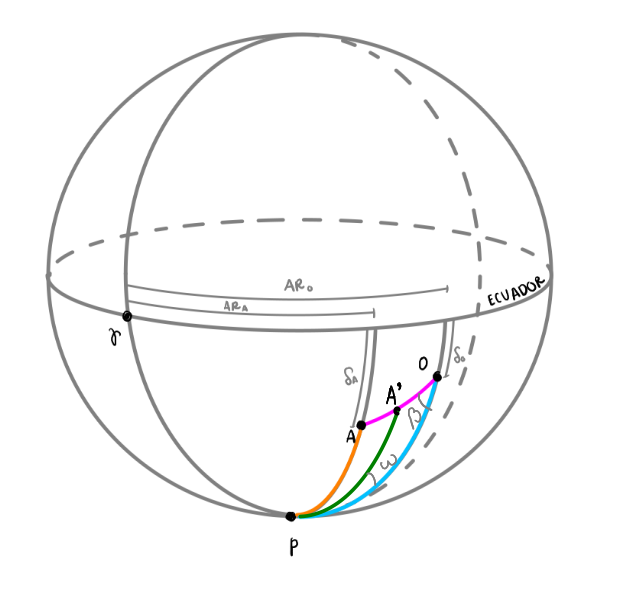

In [ ]:
#@markdown Obteniendo $\beta$

cosβ=(np.cos(PA)-np.cos(PO)*np.cos(AO))/(np.sin(PO)*np.sin(AO))
β=np.arccos(cosβ)

Entonces veamos que el nuevo triángulo esférico está formado por PA'O donde $A'O= \theta$ y podemos deducir $PA´$ como:

\begin{equation}
cos(PA´)=cos(PO)cos(A'O)+sen(PO)sen(A'O)cos(\beta)
\end{equation}

por ley de cosenos en un triángulo sobre una superficie esférica.

In [ ]:
#@markdown Hallando la longitud angular que separa $P$ y $A ´$.

cosPAprime=np.cos(PO)*np.cos(θ)+np.sin(PO)*np.sin(θ)*np.cos(β)
PAprime=np.arccos(cosPAprime)

Ahora, notemos que esta distancia que encontramos es el complemento de la nueva declinación de la estrella, de modo que:

\begin{equation}
PA'=|-90°-\delta_{A´}|\\
PA'=|90°+\delta_{A´}|\\
\delta_{A´}=PA´-90°
\end{equation}

In [ ]:
#@markdown se encuentra la coordenada de declinación de $A´$.

decAprime=PAprime-np.pi/2

y las coordenadas de la ascensión recta se pueden deducir usando el ángulo $\omega$ dado entre PO y PA´:

\begin{equation}
cos(\omega)=\frac{cos(A'O)-cos(PO)cos(PA')}{sen(PO)sen(PA')}
\end{equation}

sabiendo que:

\begin{equation}
\omega=|RA_O-RA_{A´}|\\
\end{equation}

Que por casos, lo podemos tratar como que:

* si $RA_A < RA_O$ entonces $RA_{A´}=RA_O-\omega$
* si $RA_A > RA_O$ entonces $RA_{A´}=RA_O+\omega$

In [ ]:
#@markdown se encuentra la ascención recta de $A ´$.

cosω=(np.cos(θ)-np.cos(PO)*np.cos(PAprime))/(np.sin(PO)*np.sin(PAprime))
ω=np.arccos(cosω)

RAprime=np.zeros(len(PA))

for i in range(len(PA)):

  if datos["ra [rad]"][i]<nave_ra:
    RAprime[i]=nave_ra-ω[i]

  elif datos["ra [rad]"][i]>nave_ra:
    RAprime[i]=nave_ra+ω[i]

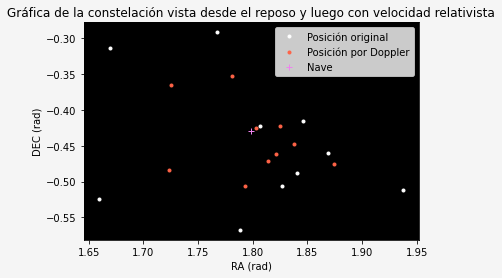

In [ ]:
#@markdown Gráfica con efecto de colimasión.
plt.figure(facecolor="whitesmoke")
plt.axes().set_facecolor("k")
plt.title("Gráfica de la constelación vista desde el reposo y luego con velocidad relativista")
plt.plot(datos["ra [rad]"],datos["dec [rad]"],".",color="white",label="Posición original")
plt.plot(RAprime,decAprime,".",color="tomato",label="Posición por Doppler")
plt.plot(nave_ra,nave_dec,"+",color="violet",label="Nave")
plt.xlabel('RA (rad)')
plt.ylabel('DEC (rad)')
plt.legend()

2. Haga una gráfica RA/DEC que muestre el corrimiento Doppler relativístico de la longitud de onda (color) visto desde la nave para cada estrella en la constelación.

El efecto Doppler relativísta establece que:

\begin{equation}
\lambda_{obs}=\lambda_{em}\gamma(1-\frac{v}{c} cos\phi)
\end{equation}

donde $\phi$ es el ángulo entre la dirección del desplazamiento de la nave y la ubicación de la estrella.

Usando el item anterior sabemos que este ángulo está dado por lo que anteriormente nombramos $\theta$  como la nueva separación angular entre la nave $O$ y una estrella $A$.

In [ ]:
#@markdown Se extraen los valores de las longitudes de onda para la constelación en reposo y luego de la colimasión.

long_em=datos["lam"].to_numpy()

long_obs=long_em*γ*(1-v_c*np.cos(θ))

# para encontrar lambda más cercano al de la referencia en "colors.csv"
long_obs=5*np.round(long_obs/5)
long_em=5*np.round(long_em/5)

In [ ]:
#@markdown Tabla de equivalencia entre longitud de onda en nm y código RGB.
cinf=pd.read_csv('colors.csv')
cinf.head()

,lamc,hex
0,380,#3800ff
1,385,#3000ff
2,390,#3200ff
3,395,#3200ff
4,400,#3200ff


In [ ]:
#@markdown Colores en código hex.

#Para obtener los colores por efecto Doppler en el catálogo de colores
colors_doppler=[cinf.hex[cinf.lamc==i].iloc[0] for i in long_obs]

#Obteniendo los colores originales
colors=[cinf.hex[cinf.lamc==i].iloc[0] for i in long_em]

Text(0, 0.5, 'DEC (rad)')

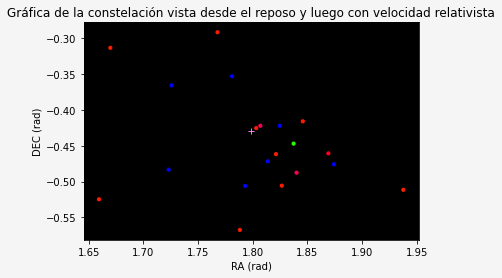

In [ ]:
#@markdown Gráfica con efecto de colimasión.
plt.figure(facecolor="whitesmoke")
plt.axes().set_facecolor("k")
plt.title("Gráfica de la constelación vista desde el reposo y luego con velocidad relativista")
plt.scatter(RAprime,decAprime,s=10,c=colors_doppler)
plt.scatter(datos["ra [rad]"],datos["dec [rad]"],s=10,c=colors)
plt.plot(nave_ra,nave_dec,"+",color="violet")
plt.xlabel('RA (rad)')
plt.ylabel('DEC (rad)')

3. Para diferentes velocidades:

In [ ]:
#@markdown Creando una función que haga todos los cálculos respectivos según la velocidad:

def colimasion_y_doppler(v):

  v_c=v
  γ=1/(1-v_c)**0.5

  #Para la colimasión

  tanθ=np.sin(AO)/(γ*(np.cos(AO)+v_c))
  θ=np.arctan(tanθ)

  cosβ=(np.cos(PA)-np.cos(PO)*np.cos(AO))/(np.sin(PO)*np.sin(AO))
  β=np.arccos(cosβ)

  cosPAprime=np.cos(PO)*np.cos(θ)+np.sin(PO)*np.sin(θ)*np.cos(β)
  PAprime=np.arccos(cosPAprime)

  decAprime=PAprime-np.pi/2

  cosω=(np.cos(θ)-np.cos(PO)*np.cos(PAprime))/(np.sin(PO)*np.sin(PAprime))
  ω=np.arccos(cosω)

  RAprime=np.zeros(len(PA))

  for i in range(len(PA)):

    if datos["ra [rad]"][i]<nave_ra:
      RAprime[i]=nave_ra-ω[i]

    elif datos["ra [rad]"][i]>nave_ra:
      RAprime[i]=nave_ra+ω[i]

  #Para el efecto Doppler

  long_obs=long_em*γ*(1-v_c*np.cos(θ))
  long_obs=5*np.round(long_obs/5)
  colors_doppler=[cinf.hex[cinf.lamc==i].iloc[0] for i in long_obs]

  return decAprime,RAprime,colors_doppler



In [ ]:
#@markdown Velocidades

v1 = 0.1; v2 = 0.2; v3 = 0.3; v4 = 0.4

In [ ]:
#@markdown Hallando las nuevas posiciones y colores para las diferentes velocidades
dec1,ra1,color1=colimasion_y_doppler(v1)
dec2,ra2,color2=colimasion_y_doppler(v2)
dec3,ra3,color3=colimasion_y_doppler(v3)
dec4,ra4,color4=colimasion_y_doppler(v4)

Text(0, 0.5, 'DEC (rad)')

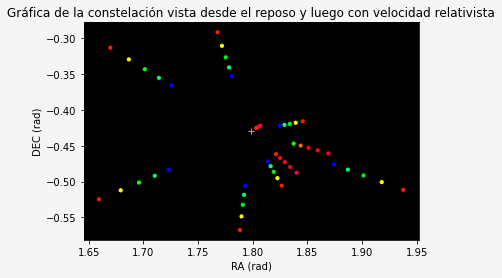

In [ ]:
#@markdown Gráfica

plt.figure(facecolor="whitesmoke")
plt.axes().set_facecolor("k")
plt.title("Gráfica de la constelación vista desde el reposo y luego con velocidad relativista")
plt.scatter(ra1,dec1,s=10,c=color1)
plt.scatter(ra2,dec2,s=10,c=color2)
plt.scatter(ra3,dec3,s=10,c=color3)
plt.scatter(ra4,dec4,s=10,c=color4)
plt.plot(nave_ra,nave_dec,"+",color="violet")
plt.scatter(datos["ra [rad]"],datos["dec [rad]"],s=10,c=colors)
plt.xlabel('RA (rad)')
plt.ylabel('DEC (rad)')